**1. Dataset Preparation**

In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import datasets
from mlxtend.data import loadlocal_mnist
from sklearn.neural_network import MLPClassifier

**Download MNIST dataset dan Extract gzip file**


In [104]:
import torchvision.datasets as datasets

mnist_train = datasets.MNIST(root='../images/mnist-dataset', train=True, download=True)
mnist_test = datasets.MNIST(root='../images/mnist-dataset', train=False, download=True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 154532419.64it/s]

Extracting ../images/mnist-dataset/MNIST/raw/train-images-idx3-ubyte.gz to ../images/mnist-dataset/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 51198518.10it/s]

Extracting ../images/mnist-dataset/MNIST/raw/train-labels-idx1-ubyte.gz to ../images/mnist-dataset/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 43881445.88it/s]

Extracting ../images/mnist-dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to ../images/mnist-dataset/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 379069.74it/s]

Extracting ../images/mnist-dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../images/mnist-dataset/MNIST/raw



In [221]:
!ls ../images/mnist-dataset/MNIST/raw/

t10k-images-idx3-ubyte	t10k-labels-idx1-ubyte	train-images-idx3-ubyte  train-labels-idx1-ubyte


**Load image dataset**

In [222]:
train_images, train_labels = loadlocal_mnist(images_path='../images/mnist-dataset/MNIST/raw/train-images-idx3-ubyte',
                                             labels_path='../images/mnist-dataset/MNIST/raw/train-labels-idx1-ubyte')

In [223]:
train_images, train_labels = loadlocal_mnist(images_path='../images/mnist-dataset/MNIST/raw/train-images-idx3-ubyte',
                                             labels_path='../images/mnist-dataset/MNIST/raw/train-labels-idx1-ubyte')

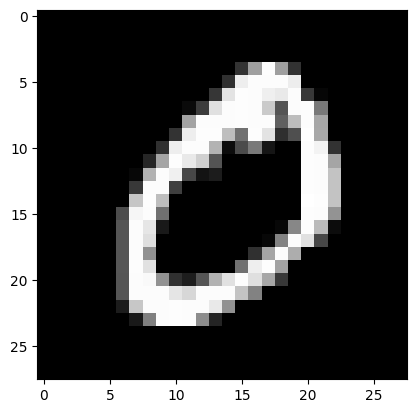

In [227]:
plt.imshow(train_images[1].reshape(28,28), cmap='gray')

In [228]:
train_labels[1]

0

**Test extract HOG feature from image**

In [229]:
feature, hog_img = hog(train_images[1].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

In [230]:
feature.shape

(144,)

<BarContainer object of 144 artists>

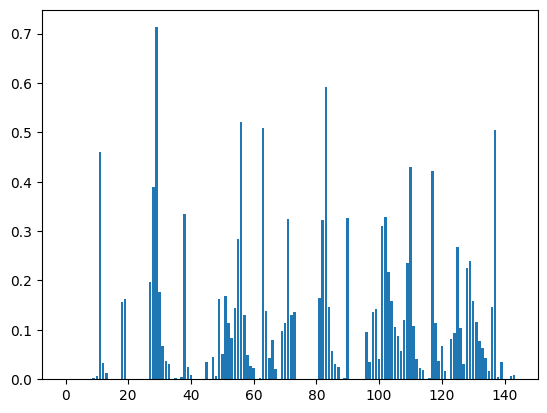

In [231]:
plt.bar(list(range(feature.shape[0])), feature)

In [232]:
feature, hog_img = hog(train_images[0].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

<BarContainer object of 144 artists>

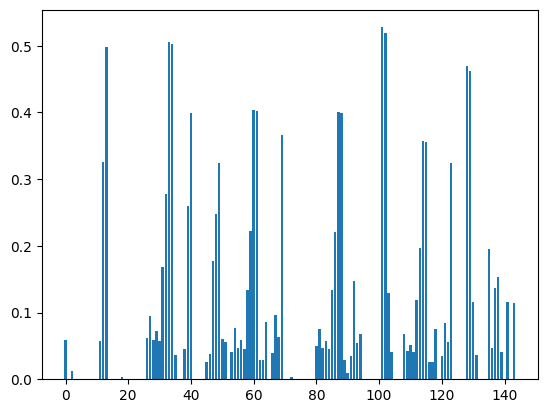

In [233]:
plt.bar(list(range(feature.shape[0])), feature)

**2. Preprocessing using HOG Feature Extraction**





In [234]:
n_dims = feature.shape[0]

In [235]:
n_dims

144

In [236]:
n_samples = images.shape[0]

In [237]:
n_samples

10000

**Create variable for dataset**

In [238]:
from sklearn.datasets import make_classification
n_features = 144
X_train, y_train = make_classification(n_samples=n_samples, n_features=n_features, n_informative=4, n_redundant=3, random_state=50)

In [239]:
X_train.shape

(10000, 144)

**Get HOG feature from each image & put into dataset variable**

In [240]:
for i in range(n_samples):
    features, _ = hog(images[i].numpy().reshape(28, 28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, block_norm='L2')
    X_train[i] = features
    y_train[i] = labels[i].item()

**Convert categorical label to one hot label**

In [241]:
from sklearn.preprocessing import LabelBinarizer

In [242]:
lb = LabelBinarizer()

In [243]:
lb.fit(y_train)

LabelBinarizer()

In [251]:
y_train_one_hot = lb.transform(y_train)

In [252]:
y_train_one_hot[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [253]:
y_train[0]

7

In [254]:
import numpy as np

In [255]:
label = lb.inverse_transform(np.array([y_train_one_hot[0]]))

In [256]:
label[0]

7

**3. Classification with Neural Networks**

In [257]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 10), solver='sgd', learning_rate_init=0.001, max_iter=100)

In [258]:
clf.fit(X_train, y_train_one_hot)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64, 10), max_iter=100, solver='sgd')

**4. Predict Test Dataset**

In [259]:
n_samples_test = test_images.shape[0]

In [262]:
X_test, y_test = make_classification(n_samples=n_samples, n_features=n_features, n_informative=2, n_redundant=0, random_state=42)

In [264]:
for i in range(n_samples):
    X_test[i], _ = hog(test_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_test[i] = test_labels[i]

In [265]:
y_test_one_hot = lb.transform(y_test)

In [266]:
y_pred_one_hot = clf.predict(X_test)

In [267]:
y_pred = lb.inverse_transform(y_pred_one_hot)

In [268]:
y_pred

array([7, 2, 1, ..., 0, 5, 6])

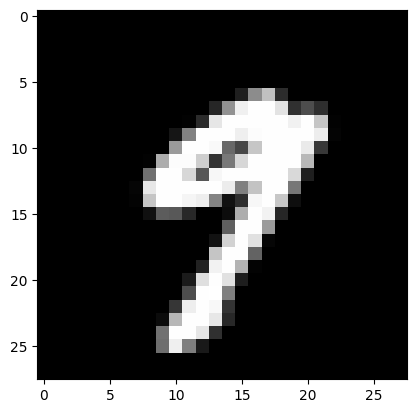

In [269]:
plt.imshow(test_images[20].reshape(28,28), cmap='gray')

In [270]:
out_one_hot = clf.predict(X_test[20].reshape(1, n_dims))

In [271]:
out_one_hot

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [272]:
out = lb.inverse_transform(out_one_hot.reshape(1,10))

In [273]:
out[0]

9

**5. Evaluation Metrics**

**5. 1 Confussion Matrix**

In [274]:
from sklearn.metrics import confusion_matrix

In [275]:
conf_mat = confusion_matrix(y_test, y_pred)

In [276]:
conf_mat

array([[ 967,    2,    2,    3,    0,    2,    4,    0,    0,    0],
       [  28, 1102,    2,    0,    2,    0,    1,    0,    0,    0],
       [ 167,    0,  832,   23,    0,    0,    0,    5,    4,    1],
       [ 145,    0,   35,  800,    0,   10,    0,    4,    7,    9],
       [ 232,   20,    0,    0,  707,    0,    4,    9,    1,    9],
       [  83,    0,    0,   32,    1,  756,   12,    0,    8,    0],
       [  51,    1,    0,    0,    5,   21,  874,    0,    6,    0],
       [ 173,    1,   28,    1,   49,    1,    0,  765,    3,    7],
       [ 195,    2,    3,    2,    0,    9,    2,    4,  754,    3],
       [ 323,    0,    0,   21,   15,    2,    0,   51,   21,  576]])

In [277]:
from mlxtend.plotting import plot_confusion_matrix

In [278]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

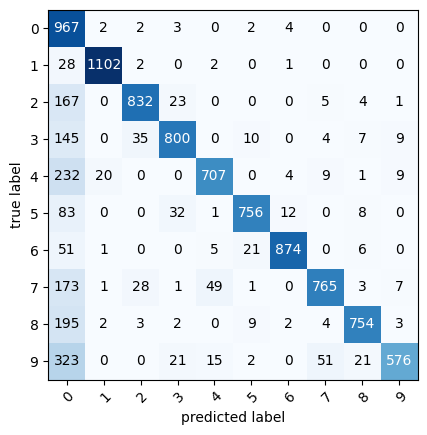

In [279]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, class_names=class_names)

**5.2 Precission**

In [280]:
from sklearn.metrics import precision_score

In [281]:
precision = precision_score(y_test, y_pred, average=None)

In [282]:
precision

array([0.40905245, 0.97695035, 0.92239468, 0.90702948, 0.90757381,
       0.94382022, 0.97435897, 0.91288783, 0.93781095, 0.95206612])

**5.3 Recall**

In [283]:
from sklearn.metrics import recall_score

In [284]:
recall = recall_score(y_test, y_pred, average=None)

In [285]:
recall

array([0.98673469, 0.97092511, 0.80620155, 0.79207921, 0.71995927,
       0.84753363, 0.91231733, 0.74416342, 0.77412731, 0.57086224])

**5.4 Accuracy**

In [286]:
from sklearn.metrics import accuracy_score

In [287]:
accuracy = accuracy_score(y_test, y_pred)

In [288]:
accuracy

0.8133

**5.5 F1-Score**

In [289]:
from sklearn.metrics import f1_score

In [290]:
f1 = f1_score(y_test, y_pred, average='macro')

In [291]:
f1

0.827853106372834